# Now trying a different way dropping features which have missing value  above 50 percent  taking mean on other missing values and building a model 

In [1]:
from pyforest import *

In [2]:
gestures=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/capstone project/Project - 2/Postures.csv")

In [3]:
gestures.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
import numpy as np


In [82]:
gestures.shape

(78096, 23)

In [83]:
gestures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 23 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       77406 non-null object
Y3       77406 non-null float64
Z3       77406 non-null float64
X4       74976 non-null float64
Y4       74976 non-null float64
Z4       74976 non-null float64
X5       65073 non-null float64
Y5       65073 non-null float64
Z5       65073 non-null float64
X6       52248 non-null float64
Y6       52248 non-null float64
Z6       52248 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 13.7+ MB


In [12]:
gestures.X3.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X4.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X5.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X6.replace(to_replace=['?'],value=[np.nan],inplace=True)

gestures.X7.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X8.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X9.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X10.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.X11.replace(to_replace=['?'],value=[np.nan],inplace=True)


In [13]:
gestures.Y3.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y4.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y5.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y6.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y7.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y8.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y9.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y10.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Y11.replace(to_replace=['?'],value=[np.nan],inplace=True)

In [14]:
gestures.Z3.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z4.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z5.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z6.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z7.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z8.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z9.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z10.replace(to_replace=['?'],value=[np.nan],inplace=True)
gestures.Z11.replace(to_replace=['?'],value=[np.nan],inplace=True)


In [15]:
gestures.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [16]:
gesturesmissing = gestures.isna()
gesturesmissing.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [17]:
gestures_num_missing = gesturesmissing.sum()
gestures_num_missing

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [18]:
gestures_num_missing / len(gestures)

Class    0.000000
User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.008835
Y3       0.008835
Z3       0.008835
X4       0.039951
Y4       0.039951
Z4       0.039951
X5       0.166756
Y5       0.166756
Z5       0.166756
X6       0.330977
Y6       0.330977
Z6       0.330977
X7       0.501332
Y7       0.501332
Z7       0.501332
X8       0.608636
Y8       0.608636
Z8       0.608636
X9       0.693096
Y9       0.693096
Z9       0.693096
X10      0.811091
Y10      0.811091
Z10      0.811091
X11      0.999590
Y11      0.999590
Z11      0.999590
dtype: float64

In [19]:
df=gestures

In [21]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [22]:
df.drop(['X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],axis=1,inplace=True)

In [23]:
df.columns



Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6'],
      dtype='object')

In [24]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
dtype: int64

In [25]:
dataframe=df.fillna(df.mean())


In [26]:
dataframe.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dataframe.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
dtype: int64

In [48]:
dataframe.X3=dataframe.Y3.astype(float)

dataframe.Y3=dataframe.Y3.astype(float)
dataframe.Z3=dataframe.Z3.astype(float)
dataframe.X4=dataframe.X4.astype(float)
dataframe.Y4=dataframe.Y4.astype(float)
dataframe.Z4=dataframe.Z4.astype(float)
dataframe.X5=dataframe.X5.astype(float)
dataframe.Y5=dataframe.Y5.astype(float)
dataframe.Z5=dataframe.Z5.astype(float)
dataframe.X6=dataframe.X6.astype(float)
dataframe.Y6=dataframe.Y6.astype(float)
dataframe.Z6=dataframe.Z6.astype(float)

In [50]:
dataframe.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
dtype: int64

In [47]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 23 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       77406 non-null object
Y3       77406 non-null float64
Z3       77406 non-null float64
X4       74976 non-null float64
Y4       74976 non-null float64
Z4       74976 non-null float64
X5       65073 non-null float64
Y5       65073 non-null float64
Z5       65073 non-null float64
X6       52248 non-null float64
Y6       52248 non-null float64
Z6       52248 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 13.7+ MB


In [49]:
dataframe.fillna(dataframe.mean(), inplace=True)


In [56]:
dataframe.columns

Index(['Class', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3',
       'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
dataframe.drop("User",axis=1,inplace=True)

In [59]:
dataframe.columns

Index(['X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3',
       'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6'],
      dtype='object')

In [58]:
dataframe.drop("Class",axis=1,inplace=True)

In [61]:
sc=StandardScaler()

In [62]:
scaled_train = pd.DataFrame(sc.fit_transform(dataframe),columns=(['X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3',
       'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6']))
scaled_train.head()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,-1.539813,-2.134410,0.872620,-1.527039,-2.130689,0.848839,-1.446567,-2.042043,0.870172,-1.982794,...,0.870639,-1.443400,-1.925568,0.897083,-1.480245e+00,-2.080181e+00,8.998191e-01,-1.536619e+00,-2.373468e+00,9.120383e-01
1,0.119838,-0.356811,-1.013425,0.840581,-1.081012,-1.244711,-0.356817,-0.050965,-0.636637,-0.345853,...,-1.189073,0.321542,-1.669868,-1.102097,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
2,0.189072,-0.336917,-0.929830,-0.322040,-0.090330,-0.577816,0.910920,-0.987664,-1.122490,-0.330109,...,-1.105769,0.393074,-1.643505,-1.032829,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
3,0.168347,-0.331881,-0.948093,-0.357362,-0.088036,-0.606862,0.887941,-0.980027,-1.141738,-0.317856,...,-1.117910,0.396025,-1.643182,-1.034564,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
4,0.152434,-0.350829,-0.980867,-0.401297,-0.106887,-0.668607,1.122104,-0.379216,-1.186441,-1.710959,...,-1.056919,0.864207,-0.902717,-1.122212,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16


In [65]:
x=pd.DataFrame(scaled_train)
y=pd.DataFrame(gestures.Class)

In [66]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=7)

In [67]:
x.head()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,-1.539813,-2.134410,0.872620,-1.527039,-2.130689,0.848839,-1.446567,-2.042043,0.870172,-1.982794,...,0.870639,-1.443400,-1.925568,0.897083,-1.480245e+00,-2.080181e+00,8.998191e-01,-1.536619e+00,-2.373468e+00,9.120383e-01
1,0.119838,-0.356811,-1.013425,0.840581,-1.081012,-1.244711,-0.356817,-0.050965,-0.636637,-0.345853,...,-1.189073,0.321542,-1.669868,-1.102097,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
2,0.189072,-0.336917,-0.929830,-0.322040,-0.090330,-0.577816,0.910920,-0.987664,-1.122490,-0.330109,...,-1.105769,0.393074,-1.643505,-1.032829,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
3,0.168347,-0.331881,-0.948093,-0.357362,-0.088036,-0.606862,0.887941,-0.980027,-1.141738,-0.317856,...,-1.117910,0.396025,-1.643182,-1.034564,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16
4,0.152434,-0.350829,-0.980867,-0.401297,-0.106887,-0.668607,1.122104,-0.379216,-1.186441,-1.710959,...,-1.056919,0.864207,-0.902717,-1.122212,-4.471646e-16,2.542311e-15,-3.801954e-15,-4.780688e-15,1.369612e-14,-3.649060e-16


In [68]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [72]:
pred_rf=rf1.fit(Xtrain,Ytrain).predict(Xtest)

C:\Users\Eagle3y3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [74]:
print("accuracy",accuracy_score(Ytest,pred_rf))
print("kappa",cohen_kappa_score(Ytest,pred_rf))
print("mcc",matthews_corrcoef(Ytest,pred_rf))

accuracy 0.9597951344430218
kappa 0.9497196505668052
mcc 0.9497486895525172


In [77]:
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix

In [79]:
print('classification report is {}'.format( classification_report(Ytest,pred_rf)))

classification report is               precision    recall  f1-score   support

           1       0.99      0.99      0.99      3249
           2       0.92      0.95      0.93      2988
           3       0.96      0.96      0.96      3326
           4       0.95      0.94      0.94      2951
           5       0.97      0.95      0.96      3106

    accuracy                           0.96     15620
   macro avg       0.96      0.96      0.96     15620
weighted avg       0.96      0.96      0.96     15620



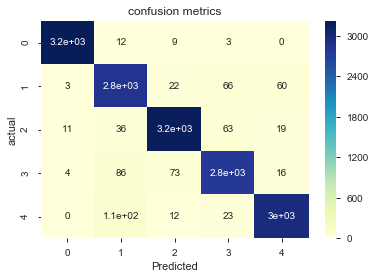

In [80]:
sns.heatmap(confusion_matrix(Ytest,pred_rf),annot=True,cmap='YlGnBu')

plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("confusion metrics")
plt.show()

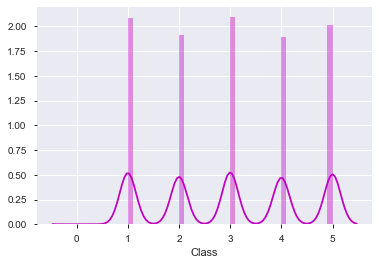

In [81]:
sns.distplot(gestures.Class, color = "m")
plt.show()

(78096, 38)

In [87]:
gestures1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [98]:
gestures1.X6.value_counts()

?                    25848
75.0765407117555         3
-6.22797122021721        1
-12.8554291351502        1
24.4544903098582         1
12.7406663740255         1
42.6940521518761         1
33.7571231660148         1
28.4826982482009         1
103.152624816926         1
42.8368215105872         1
-2.54315169417491        1
-15.9969456149344        1
38.9373490400425         1
22.2398243888829         1
50.2352612292335         1
44.7444844739094         1
9.69289353217216         1
47.528967104977          1
103.692759939012         1
74.5868531801386         1
5.67442983865805         1
28.7160139818121         1
47.3422653688897         1
77.6586834697899         1
104.319402898953         1
-8.16261907871072        1
3.47244143424162         1
59.7142245310978         1
90.1776962969275         1
                     ...  
83.1354580491041         1
-7.42717048502451        1
39.1955679205764         1
100.887226535604         1
28.2606725539973         1
-20.6453202726901        1
7

In [99]:
gestures1.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')